In [1]:
# Melakukan import library
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Melakukan import gambar
def impor(gambar):
    gbr = cv2.imread(gambar)
    rgb = cv2.cvtColor(gbr, cv2.COLOR_BGR2RGB)
    return rgb

In [3]:
# Mendefinisikan dataset
dataset = np.array(["MONOCYTE.png",
                    "LYMPHOCYTE.png",
                    "EOSINOPHIL.png",
                    "BASOPHIL.png",
                    "NEUTROPHIL.png"])
datasets = np.array(["M.png","L.png","E.png","B.png","N.png"])

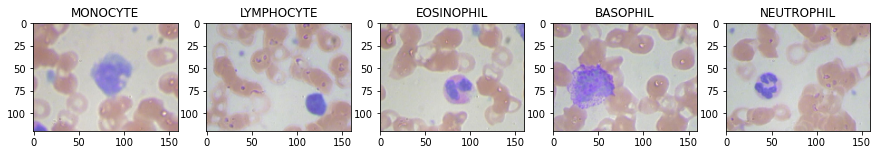

In [4]:
# Menampilkan citra semula
def plot(isiPlot, pil=2):
    plt.figure(figsize=(15,15))
    for i in range(len(dataset)):
        plt.subplot(1,len(dataset),i+1)
        plt.title(dataset[i][:-4])
        if pil == 1:
            plt.imshow(impor(isiPlot[i]))
        else:
            plt.imshow(isiPlot[i], cmap="gray")

plot(dataset, 1)

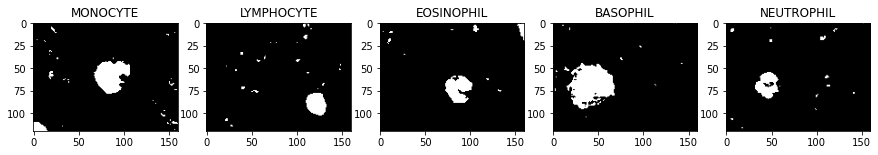

In [5]:
# Mengonversi citra ke B&W
def konversi(gambar):
    gbr = impor(gambar)
    image = cv2.cvtColor(gbr, cv2.COLOR_BGR2GRAY)
    ret, thr = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    thr = 255-thr
    return thr

mo = konversi(datasets[0])
ly = konversi(datasets[1])
si = konversi(datasets[2])
ba = konversi(datasets[3])
ne = konversi(datasets[4])

# print(mo.shape)
plot([mo, ly, si, ba, ne])

In [6]:
# Mendefinisikan kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
kernel

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [7]:
# Membuat fungsi operasi morfologi dasar
def dasar(img, kernel, pil):
    padding = len(kernel)//2 
    bar, kol = img.shape 
    image_dil = np.pad(np.zeros(img.shape), padding) 
    nol = (kernel == 0).sum() 
    img_ero = np.pad(img, padding) 
    image_ero = np.zeros(img.shape) 
    
    if pil == 1:
        for i in range(bar):
            for j in range(kol):
                if img[i][j] == 255: 
                    image_dil[i:i+len(kernel), j:j+len(kernel)] += kernel 
        image_dil[image_dil>0] = 255 
        return image_dil[padding:bar, padding:kol]
    else:
        for i in range(bar):
            for j in range(kol):
                if img_ero[i+padding][j+padding] == 255: 
                    jum_nol = ((img_ero[i:i+len(kernel), j:j+len(kernel)]*kernel) == 0).sum() 
                    if nol == jum_nol: 
                        image_ero[i][j] = 255 
        return image_ero

In [8]:
# Membuat fungsi operasi morfologi gabungan
def tingkat(img, pil):
    dil = dasar(img, kernel, 1)
    ero = dasar(img, kernel, 2)
    if pil == 1:
        opening = dasar(ero , kernel, 1)
        return opening
    else:
        closing = dasar(dil , kernel, 2)
        return closing

# DILASI

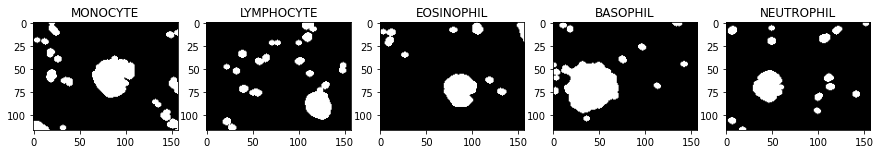

In [9]:
plot([dasar(mo, kernel, 1), dasar(ly, kernel, 1), dasar(si, kernel, 1), dasar(ba, kernel, 1), dasar(ne, kernel, 1)])

# EROSI

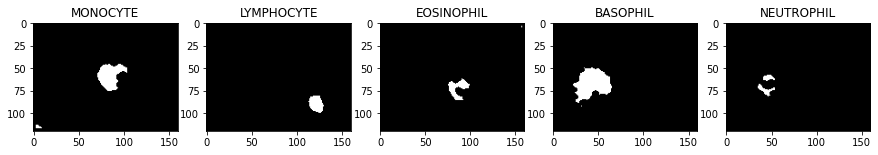

In [10]:
plot([dasar(mo, kernel, 2), dasar(ly, kernel, 2), dasar(si, kernel, 2), dasar(ba, kernel, 2), dasar(ne, kernel, 2)])

# OPENING

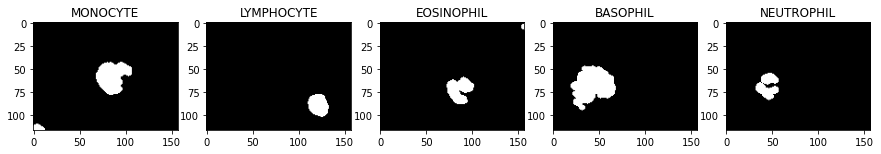

In [11]:
plot([tingkat(mo, 1), tingkat(ly, 1), tingkat(si, 1), tingkat(ba, 1), tingkat(ne, 1)])

# CLOSING

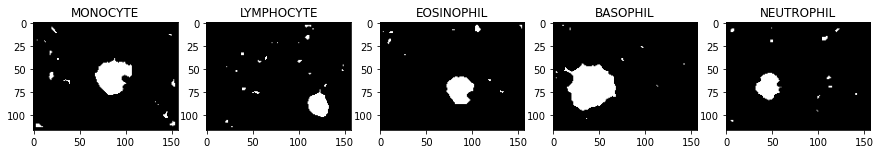

In [12]:
plot([tingkat(mo, 2), tingkat(ly, 2), tingkat(si, 2), tingkat(ba, 2), tingkat(ne, 2)])